# 数据处理

In [2]:
import pandas as pd
df=pd.read_fwf("/data/bocheng/data/IAM/gt_test.txt",header=None)
df.rename(columns={0:"file_name",1:"text"},inplace=True)
df.head()

,file_name,text,2
0,c04-110-00.jpg,Become a success with a disc and hey presto ! ...,NaN
1,c04-110-01.jpg,"assuredness "" Bella Bella Marie "" ( Parlophone...",.
2,c04-110-02.jpg,I don't think he will storm the charts with th...,NaN
3,c04-110-03.jpg,"CHRIS CHARLES , 39 , who lives in Stockton-on-...",NaN
4,c04-116-00.jpg,He is also a director of a couple of garages ....,NaN


In [3]:
del df[2]
df['file_name']=df["file_name"].apply(lambda x:x+'g' if x.endswith('jp') else x)
df.head()

,file_name,text
0,c04-110-00.jpg,Become a success with a disc and hey presto ! ...
1,c04-110-01.jpg,"assuredness "" Bella Bella Marie "" ( Parlophone..."
2,c04-110-02.jpg,I don't think he will storm the charts with th...
3,c04-110-03.jpg,"CHRIS CHARLES , 39 , who lives in Stockton-on-..."
4,c04-116-00.jpg,He is also a director of a couple of garages ....


In [4]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2)
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

In [5]:
test_df

,file_name,text
0,g03-004-03.jpg,"shop , which was open from 8 o'clock in the mo..."
1,d01-098-03.jpg,which have survived the centuries is ample evi...
2,n01-045-00.jpg,"Now , as Alastair reduced the thrust , the"
3,m04-038-02.jpg,scene . The first intimation that all was not ...
4,m03-110-00.jpg,"Sally and of course Mrs Septimus , for surely"
...,...,...
578,p01-174-04.jpg,never been inside . Very remiss of
579,m04-081-03.jpg,"good man , mind ; knew his job . But out of"
580,p02-022-01.jpg,"beach . A moon like this mustn't be wasted . """
581,n04-107-08.jpg,said John .


In [6]:
import torch
from torch.utils.data import Dataset
from PIL import Image

In [7]:
class IAMDataset(Dataset):
    def __init__(self,root_dir,df,processor,max_target_length=128):
        self.root_dir=root_dir
        self.df=df
        self.processor=processor
        self.max_target_length=max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self,idx):
        file_name=self.df['file_name'][idx]
        text=self.df['text'][idx]
        image=Image.open(self.root_dir+file_name).convert("RGB")
        pixel_values=self.processor(image,return_tensors="pt").pixel_values
        labels=self.processor.tokenizer(text,padding="max_length",max_length=self.max_target_length).input_ids
        labels=[label if label !=self.processor.tokenizer.pad_token_id else -100 for label in labels]
        encoding={"pixel_values":pixel_values.squeeze(),"labels":torch.tensor(labels)}
        return encoding

In [8]:
import os

os.environ["XDG_CACHE_HOME"] = "/data/bocheng/.cache"
os.environ["HUGGINGFACE_HUB_CACHE"] = "/data/bocheng/.cache/huggingface/hub/"
from transformers import TrOCRProcessor
processor=TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
train_dataset=IAMDataset(root_dir="/data/bocheng/data/IAM/image/",df=train_df,processor=processor)
eval_dataset=IAMDataset(root_dir="/data/bocheng/data/IAM/image/",df=test_df,processor=processor)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [9]:
len(train_dataset),len(eval_dataset)

(2332, 583)

In [10]:
encoding=train_dataset[0]
for k,v in encoding.items():
    print(k,v.shape)

pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])


In [11]:
image=Image.open(train_dataset.root_dir+train_df['file_name'][0]).convert("RGB")

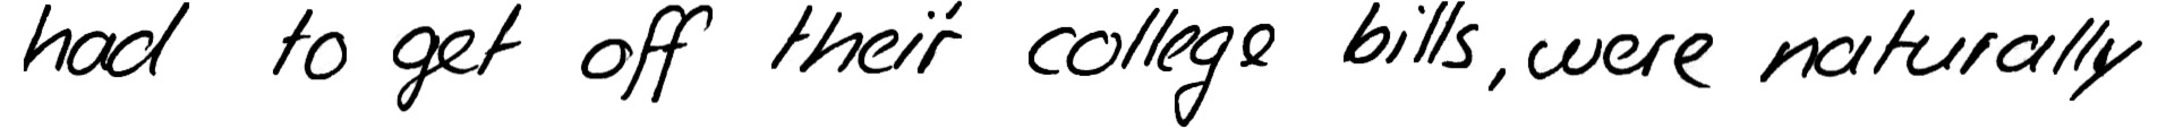

In [12]:
image

In [13]:
labels=encoding['labels']
labels[labels==-100]=processor.tokenizer.pad_token_id
label_str=processor.decode(labels,skip_special_token=True)
print(label_str)

<s>had to get to pay off their college bills, were naturally</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


In [14]:
labels

tensor([    0, 12186,     7,   120,     7,   582,   160,    49,  1564,  4033,
         2156,    58,  8366,     2,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1])

# 训练模型

In [15]:
from transformers import VisionEncoderDecoderModel
model=VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")

/home/bocheng/softinstalled/anaconda3/envs/torch2/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [1]:
from transformers import Seq2SeqTrainer,Seq2SeqTrainingArguments
training_args=Seq2SeqTrainingArguments(predict_with_generate=True,evaluation_strategy="steps",per_device_train_batch_size=8,per_device_eval_batch_size=8,fp16=True,output_dir="./",logging_steps=2,save_steps=1000,eval_steps=200)


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/bocheng/softinstalled/anaconda3/envs/torch2/lib/python3.11/site-packages/bitsandbytes/libbitsandbytes_cuda117.so
CUDA SETUP: CUDA runtime path found: /home/bocheng/softinstalled/anaconda3/envs/torch2/lib/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /home/bocheng/softinstalled/anaconda3/envs/torch2/lib/python3.11/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/home/bocheng/softinstalled/anaconda3/envs/torch2/lib/python3.11/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] files: {PosixPath('/home/bocheng/softinstalled/anaconda3/envs/torch2/lib/libcudart.so.11.0'), PosixPath('/home/bocheng/softinstalled/anaconda3/envs/torch2/lib/libcudart.so')}.. We'll flip a coin and try one of these, in order to fail forward.
Either way, this might cause trouble in the future:
If you get `CUDA error: invalid device function` errors, the above might be the cause and the solution is to make sure only one ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] in the paths that we search based on your env.
  warn(msg)


In [17]:
from datasets import load_metric
cer_metric=load_metric('cer')

/tmp/ipykernel_2695628/4104442964.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  cer_metric=load_metric('cer')
/home/bocheng/softinstalled/anaconda3/envs/torch2/lib/python3.11/site-packages/datasets/load.py:759: FutureWarning: The repository for cer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/cer/cer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [23]:
def compute_metrics(pred):
    labels_ids=pred.label_ids
    pred_ids=pred.predictions
    pred_str=processor.batch_decode(pred_ids,skip_special_tokens=True)
    labels_ids[labels_ids==-100]=processor.tokenizer.pad_token_id
    label_str=processor.batch_decode(labels_ids,skip_special_tokens=True)
    cer=cer_metric.compute(predictions=pred_str,references=label_str)
    return {"cer":cer}

In [24]:
from transformers import default_data_collator
trainer=Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator
    
)
trainer.train()

Step,Training Loss,Validation Loss,Cer
200,1.432700,1.618832,0.200339
400,0.639500,1.324726,0.165383
600,0.754800,1.209159,0.143692
800,0.440600,1.028381,0.112688


TrainOutput(global_step=876, training_loss=0.8652731869114588, metrics={'train_runtime': 423.0116, 'train_samples_per_second': 16.539, 'train_steps_per_second': 2.071, 'total_flos': 6.190728572823405e+18, 'train_loss': 0.8652731869114588, 'epoch': 3.0})